Student Name: Anay Patel

ID: 7758845053

In [5]:
# Set Up Environment

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from astropy.table import Table, Column
import sklearn.model_selection as model_selection

In [6]:
# Load Data

data_set_path = '../data/airfoil_self_noise.dat'

var_set = ['frequency_hz',
          'attack_angle_degree',
          'chord_length_m',
          'free_stream_velocity_m_s',
          'suction_side_displacement_thickness_m']

head_set = []
head_set.extend(var_set)
head_set.append('scaled_sound_pressure_level_dB')

data = pd.read_table(data_set_path, sep = '\s+', header=None, names=head_set)

In [7]:
# Part Bi

df = data.copy()

total_rows = len(df.axes[0])
total_cols = len(df.axes[1])

print("Num Rows (Observations): "+ str(total_rows))
print("Num Cols (All the Independent Variables, and The Dependent Variable (Scaled Sound Pressure Level)): "+ str(total_cols))

Num Rows (Observations): 1503
Num Cols (All the Independent Variables, and The Dependent Variable (Scaled Sound Pressure Level)): 6


There doesn't appear to be any clear observable positive/negative correlations between the independent variables and the dependent variable.

Chord Length only had 6 possible unique values for all of the observations.

Free Stream Velocity only had 4 possible unique values for all of the observations.

The remaining independent variables had a variety of different unique values for all of the observations.



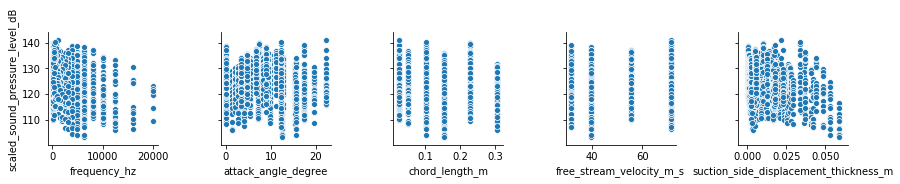

In [8]:
# Part Bii

sb.pairplot(df, x_vars = var_set, y_vars = ['scaled_sound_pressure_level_dB'])

print("There doesn't appear to be any clear observable positive/negative correlations between the independent variables and the dependent variable.\n")

print("Chord Length only had 6 possible unique values for all of the observations.\n")

print("Free Stream Velocity only had 4 possible unique values for all of the observations.\n")

print("The remaining independent variables had a variety of different unique values for all of the observations.\n")

In [9]:
# Part Biii

summ = df.describe()

summ.loc['IQR'] = summ.loc['75%'] - summ.loc['25%']
summ.loc['range'] = summ.loc['max'] - summ.loc['min']

summ = summ.drop('count')
summ = summ.drop('std')
summ = summ.drop('min')
summ = summ.drop('max')

summ

,frequency_hz,attack_angle_degree,chord_length_m,free_stream_velocity_m_s,suction_side_displacement_thickness_m,scaled_sound_pressure_level_dB
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
IQR,3200.000000,7.900000,0.177800,31.700000,0.013041,9.804500
range,19800.000000,22.200000,0.279400,39.600000,0.058011,37.607000


frequency_hz  Simple Linear Regression
                                  OLS Regression Results                                  
Dep. Variable:     scaled_sound_pressure_level_dB   R-squared:                       0.153
Model:                                        OLS   Adj. R-squared:                  0.152
Method:                             Least Squares   F-statistic:                     270.4
Date:                            Wed, 25 Sep 2019   Prob (F-statistic):           5.36e-56
Time:                                    23:34:17   Log-Likelihood:                -4910.5
No. Observations:                            1503   AIC:                             9825.
Df Residuals:                                1501   BIC:                             9836.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                   coef    std err          t      

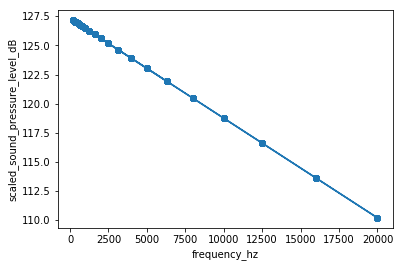

attack_angle_degree  Simple Linear Regression
                                  OLS Regression Results                                  
Dep. Variable:     scaled_sound_pressure_level_dB   R-squared:                       0.024
Model:                                        OLS   Adj. R-squared:                  0.024
Method:                             Least Squares   F-statistic:                     37.49
Date:                            Wed, 25 Sep 2019   Prob (F-statistic):           1.17e-09
Time:                                    23:34:18   Log-Likelihood:                -5016.4
No. Observations:                            1503   AIC:                         1.004e+04
Df Residuals:                                1501   BIC:                         1.005e+04
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                          coef    std err   

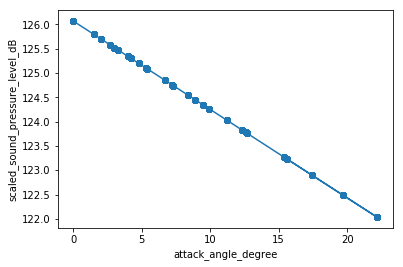

chord_length_m  Simple Linear Regression
                                  OLS Regression Results                                  
Dep. Variable:     scaled_sound_pressure_level_dB   R-squared:                       0.056
Model:                                        OLS   Adj. R-squared:                  0.055
Method:                             Least Squares   F-statistic:                     88.66
Date:                            Wed, 25 Sep 2019   Prob (F-statistic):           1.70e-20
Time:                                    23:34:18   Log-Likelihood:                -4991.8
No. Observations:                            1503   AIC:                             9988.
Df Residuals:                                1501   BIC:                             9998.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                     coef    std err          t  

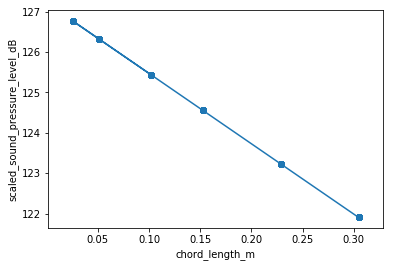

free_stream_velocity_m_s  Simple Linear Regression
                                  OLS Regression Results                                  
Dep. Variable:     scaled_sound_pressure_level_dB   R-squared:                       0.016
Model:                                        OLS   Adj. R-squared:                  0.015
Method:                             Least Squares   F-statistic:                     23.87
Date:                            Wed, 25 Sep 2019   Prob (F-statistic):           1.14e-06
Time:                                    23:34:18   Log-Likelihood:                -5023.1
No. Observations:                            1503   AIC:                         1.005e+04
Df Residuals:                                1501   BIC:                         1.006e+04
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                               coef    

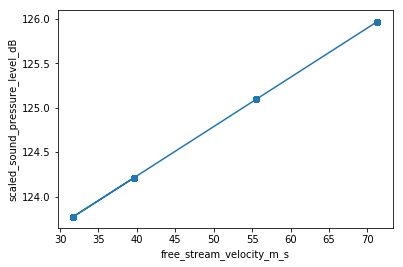

suction_side_displacement_thickness_m  Simple Linear Regression
                                  OLS Regression Results                                  
Dep. Variable:     scaled_sound_pressure_level_dB   R-squared:                       0.098
Model:                                        OLS   Adj. R-squared:                  0.097
Method:                             Least Squares   F-statistic:                     162.6
Date:                            Wed, 25 Sep 2019   Prob (F-statistic):           1.92e-35
Time:                                    23:34:18   Log-Likelihood:                -4957.6
No. Observations:                            1503   AIC:                             9919.
Df Residuals:                                1501   BIC:                             9930.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                          

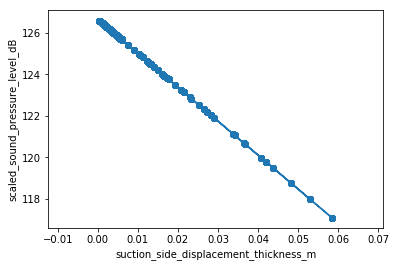

In [10]:
# Part C

coeffs = []

for var in var_set:
    print(var, " Simple Linear Regression")
    model = sm.OLS(df['scaled_sound_pressure_level_dB'], sm.add_constant(df[var])).fit()
    pred = model.predict()
    print(model.summary())
    coeffs.append(model.params)
    plt.scatter(df[var], pred)
    plt.plot(df[var], pred)
    plt.xlabel(var)
    plt.ylabel('scaled_sound_pressure_level_dB')
    plt.show()

All of the simple regression models appear to be statistically significant because they all have a p-value of 0.

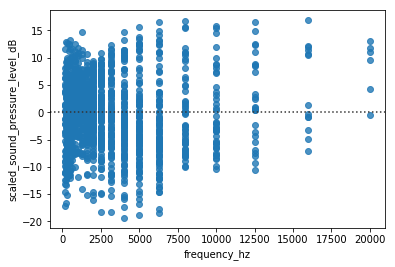

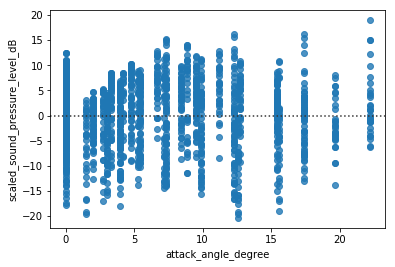

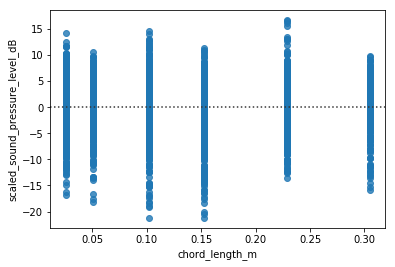

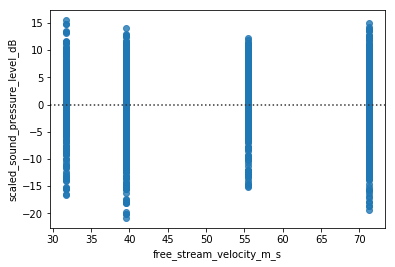

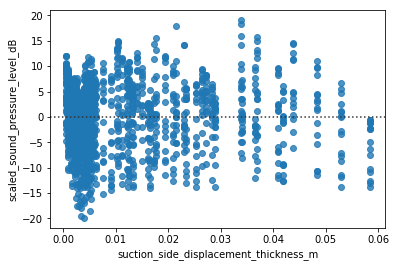

<Figure size 432x288 with 0 Axes>

In [11]:
# Outliers

for var in var_set:
    sb.residplot(df[var] ,df['scaled_sound_pressure_level_dB'])
    plt.figure()

There do not appear to be any significant outliers that would require removal for each of the regression tasks.

In [12]:
# Part D

X = df[var_set]
y = df['scaled_sound_pressure_level_dB']

multi_model = sm.OLS(y, sm.add_constant(X)).fit()
multi_pred = multi_model.predict()
print(multi_model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     scaled_sound_pressure_level_dB   R-squared:                       0.516
Model:                                        OLS   Adj. R-squared:                  0.514
Method:                             Least Squares   F-statistic:                     318.8
Date:                            Wed, 25 Sep 2019   Prob (F-statistic):          1.15e-232
Time:                                    23:34:20   Log-Likelihood:                -4490.1
No. Observations:                            1503   AIC:                             8992.
Df Residuals:                                1497   BIC:                             9024.
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                                            coef    std err          t      P>|t|      [0.

We can reject the null hypothesis for all the predictors because the p-value is equal to 0 for all of them, meaning there is an observed relationship between the predictors and the independent variable.


                                       coeff multi  coeff simple
frequency_hz                             -0.001282     -0.000855
attack_angle_degree                      -0.421912     -0.181972
chord_length_m                          -35.688001    -17.416982
free_stream_velocity_m_s                  0.099854      0.055420
suction_side_displacement_thickness_m  -147.300519   -164.027463


Text(0,0.5,'multi coeff')

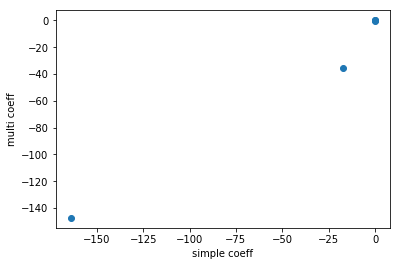

In [13]:
# Part E

multi_params = multi_model.params[1:6]
simple_params = []

for i in range(len(coeffs)):
    simple_params.append(coeffs[i][1])

simple_params = pd.DataFrame(simple_params, index=var_set, columns = ['coeff simple'])    
multi_params = pd.DataFrame(multi_params, columns = ['coeff multi'])

params = pd.merge(left = multi_params, right = simple_params, left_index = True, right_index = True)
print()
print(params)

plt.scatter(params['coeff simple'], params['coeff multi'])
plt.xlabel('simple coeff')
plt.ylabel('multi coeff')

In [14]:
# Part F

pf = PolynomialFeatures(degree = 2)

for var in var_set:
    print('Poly Regression for ', var)
    
    x = df[var].values.reshape(-1,1)
    
    var_pf = pf.fit_transform(x)
    model = sm.OLS(df['scaled_sound_pressure_level_dB'], var_pf).fit()
    print(model.summary())


Poly Regression for  frequency_hz
                                  OLS Regression Results                                  
Dep. Variable:     scaled_sound_pressure_level_dB   R-squared:                       0.173
Model:                                        OLS   Adj. R-squared:                  0.172
Method:                             Least Squares   F-statistic:                     157.3
Date:                            Wed, 25 Sep 2019   Prob (F-statistic):           9.72e-63
Time:                                    23:34:20   Log-Likelihood:                -4891.9
No. Observations:                            1503   AIC:                             9790.
Df Residuals:                                1500   BIC:                             9806.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|  

The p-values indicate that there is a non-linear relationship between frequency_hz and the scaled_sound_pressure_level_dB.

In [15]:
# Part G

X = df[var_set]
y = df['scaled_sound_pressure_level_dB']

p = PolynomialFeatures(interaction_only = True)

x_poly_int = p.fit_transform(X)
features = p.get_feature_names(X.columns)

int_model = sm.OLS(df['scaled_sound_pressure_level_dB'], sm.add_constant(x_poly_int))
int_fit = int_model.fit()

poly_coeff = pd.DataFrame(data = int_fit.params.values, index = features, columns = ['coeff'])
poly_p = pd.DataFrame(data = round(int_fit.pvalues, 4).values, index = features, columns = ['p values'])

print(poly_p)


                                                    p values
1                                                     0.0000
frequency_hz                                          0.0147
attack_angle_degree                                   0.0147
chord_length_m                                        0.0000
free_stream_velocity_m_s                              0.2231
suction_side_displacement_thickness_m                 0.7570
frequency_hz attack_angle_degree                      0.1048
frequency_hz chord_length_m                           0.0000
frequency_hz free_stream_velocity_m_s                 0.0779
frequency_hz suction_side_displacement_thickness_m    0.0000
attack_angle_degree chord_length_m                    0.0023
attack_angle_degree free_stream_velocity_m_s          0.7354
attack_angle_degree suction_side_displacement_t...    0.0588
chord_length_m free_stream_velocity_m_s               0.0262
chord_length_m suction_side_displacement_thickn...    0.0002
free_stream_velocity_m_s

Yes, there is evidence of association of interactions of predictors with the response. The following did not have statistically significant interactions: frequency_hz-attack_angle_degree, attack_angle_degree:free_stream_velocity_m_s, attack_angle_degree:suction_side_displacement_thickness_m. The remaining combinations did have statistically significant interactions (p-value of less than 0.05).

In [16]:
# Part H

train, test = model_selection.train_test_split(df, train_size=0.70, test_size=0.30)

x_train = train
y_train = x_train.pop('scaled_sound_pressure_level_dB')

x_test = test
y_test = x_test.pop('scaled_sound_pressure_level_dB')

multi_model = sm.OLS(y_train, sm.add_constant(x_train))
multi_fit = multi_model.fit()

train_pred = multi_fit.fittedvalues
test_pred = multi_fit.predict(sm.add_constant(test[var_set]))

print("MSE Test: ", mean_squared_error(y_train, train_pred))
print("MSE Train: ", mean_squared_error(y_test, test_pred))

MSE Test:  21.23151066591974
MSE Train:  27.39878974988121


In [17]:
p = PolynomialFeatures(2)

x_train = p.fit_transform(x_train)

full_model = sm.OLS(y_train, x_train)
full_fit = full_model.fit()

full_coeff = pd.DataFrame(data = full_fit.params.values, index = features, columns = ['coeff'])
full_p = pd.DataFrame(data = round(int_fit.pvalues, 4).values, index = features, columns = ['p values'])

print("MSE Test: ", mean_squared_error(y_train, train_pred))
print("MSE Train: ", mean_squared_error(y_test, test_pred))

print(full_p)

ValueError: Shape of passed values is (1, 21), indices imply (1, 16)